# Carregando os dados
Inicialmente são carregados os dados em formato de *array* e são carregadas as bibliotecas necessárias.



In [3]:
import numpy as np
import pandas as pd
#!pip install --upgrade seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored
from IPython.display import display, HTML, Markdown
from sklearn.metrics import mean_squared_error as mse
import os
for mode in ['imgs','csv','latex']:
    if(not(os.path.isdir(mode))):
        os.makedirs(mode)

'''
tabela_1 = ['14 84 119 137 158 183 218 255 312 415 \
22 96 121 140 162 189 225 264 330 420 \
61 104 125 145 167 190 230 273 345 447 \
77 111 128 149 171 197 237 282 360 472 \
80 112 132 153 175 210 243 301 383 490']
'''

tabela1_7 = ["232 244 256 264 268 272 276 280 284 288 296 \
300 308 316 324 328 332 336 340 344 348 356 \
364 368 372 376 380 384 388 392 396 400 404 \
408 412 416 420 424 428 432 436 440 444 452 \
456 460 464 468 472 476"]

tabela1_8 = ["102.8 105.2 106.8 108.0 108.4 109.2 109.6 110.8 \
111.2 111.6 112.0 112.4 112.8 113.2 114.4 115.6 \
116.4 117.2 118.8 119.2 120.02 120.4 120.8 121.6 \
122.0 122.4 122.8 123.2 123.6 124.4 124.8 125.2 \
125.6 126.4 127.2 128.4 128.8 129.2 130.0 130.4 130.8 \
131.2 131.6 132.0 132.4 132.8 133.2 133.6 134.0 134.4 "]

tabela1_9 = ["34 46 50 58 62 70 74 78 82 86 94 98 \
102 114 122 130 138 146 158 162 166 170 \
174 186 190 194 198 210 214 226 230 234 246 \
254 270 282 286 290 294 298 302 306 310 326 \
330 334 338 342 350 354"]

tabela1_10 = ["4.0 5.6 8.8 9.6 10.4 11.6 13.2 14.0 14.8 15.2 \
16.0 16.4 17.2 17.6 18.0 18.8 19.2 20.0 20.8 21.2 \
21.6 22.4 23.2 23.6 24.0 25.2 25.6 26.0 26.4 26.8 \
27.2 28.0 28.4 28.8 29.2 30.4 30.8 31.6 32.0 32.4 \
32.8 33.2 33.6 34.0 35.2 35.6 36.0 36.4 36.8 37.6"]


tabelas = [tabela1_7,tabela1_8,tabela1_9,tabela1_10]

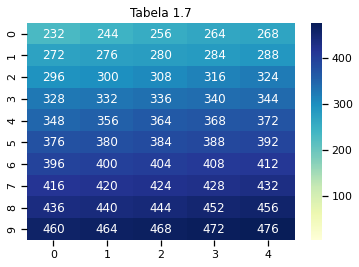

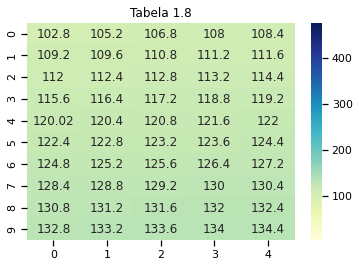

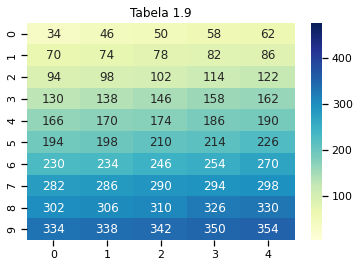

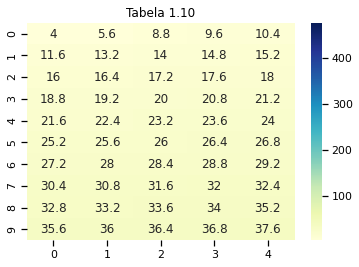

In [4]:
sns.set_context("notebook")
valores = []
for fl in tabelas:
    reslist = []
    for i in fl:
        arr = [float(numb) for numb in i.split()]
        reslist = reslist + arr
    valores.append(reslist)

min_vals, max_vals = np.amin(valores), np.amax(valores)

# Apresentando as tabelas
for idx,val in enumerate(valores):
    fig = plt.figure(dpi=200)
    plt.title("Tabela 1.{}".format(idx+7))
    reshaped = np.reshape(np.array(val),(10,-1))
    df = pd.DataFrame(reshaped)
    sns.heatmap(df,annot=True,cmap="YlGnBu",fmt='g',vmin=min_vals,vmax=max_vals)
    plt.savefig("imgs/heatmap_tabela_1_{}.png".format(idx+7))

In [65]:
sns.set_style('darkgrid')
pd.set_option('precision', 2)
def save_latex(name,df):
    with open("latex/{}.tex".format(name),'w') as fl:
        fmt = "|l|"+"p{1.5cm}|"*len(df.columns)
        if("cprob_acc" in name):
            cap = "Confiabilidade para a Tabela {}.{}".format(name.split("_")[-2],name.split("_")[-1])
        elif("prob_acc" in name):
            cap = "Probabilidade acumulada para a Tabela {}.{}".format(name.split("_")[-2],name.split("_")[-1])
        elif("prob" in name):
            cap = "Probabilidade intervalar para a Tabela {}.{}".format(name.split("_")[-2],name.split("_")[-1])
        elif("dens" in name):
            cap = "Densidade de probabilidade para a Tabela {}.{}".format(name.split("_")[-2],name.split("_")[-1])
        elif("histogram" in name):
            cap = "Frequência para a Tabela {}.{}".format(name.split("_")[-2],name.split("_")[-1])
        if("histogram" in name):
            multicol_txt = "Intervalos [h]"
        else:
            multicol_txt = "Tempo central [h]"
        df_str = df.to_latex(column_format=fmt,bold_rows=True,label="tab:"+name,caption=cap)
        df_str = df_str.replace(r"\\",r"\\ \hline")
        df_str = df_str.replace(r"|}",r"|}\hline")
        df_str = df_str.replace(r"\begin{table}",r"\begin{table}[H]")
        df_str = df_str.replace(r"\toprule",r"\toprule {}&\multicolumn{7}{c|}{"+multicol_txt+r"}\\\cline{2-8}")
        df_str = df_str.replace(r"\$",r"$")
        df_str = df_str.replace(r"\textasciicircum",r"^")
        df_str = df_str.replace(r"\{",r"{") 
        df_str = df_str.replace(r"\}",r"}") 
        fl.write(df_str)
def fit_function(x,y,max_deg,eps=1e-9, verbose=False):
    for deg in range(max_deg+1):
        y_coef = np.polyfit(x,y,deg=deg)
        y_val = [np.sum([y_coef[n]*(x_n**(len(y_coef)-n-1)) for n in range(len(y_coef))]) for x_n in x]
        y_error = mse(y,y_val)
        if (y_error<eps):
            y_lamb = lambda x: np.sum([y_coef[n]*(x**(len(y_coef)-n-1)) for n in range(len(y_coef))],axis=0)
            eq_str = "y = "
            eq_str += " + ".join(["{:.2e}*x^{:d}".format(y_coef[n],len(y_coef)-n-1) for n in range(len(y_coef))])
            if(verbose): print("Equation:",eq_str)
            return y_coef, y_error, y_lamb, eq_str

for idx,val in enumerate(valores):
    display(Markdown("# Tabela 1.{}".format(idx+7))) #print(colored("+ ==== Tabela 1.{}".format(idx+7),'blue'))
    # Obtem-se o número de classes, a quantidade de intervalos(bins),
    # os valores mínimos e máximos dentro da distribuição e o tamanho 
    # de cada um dos intervalos
    classes = len(val)
    n_bins = floor(np.sqrt(classes))
    min, max = np.amin(val), np.amax(val)
    bin_wid = (max-min)/n_bins
    #print("Samples: {}\nMinimum: {}\nMaximum: {}\nNo. bins: {}\nBin width: {}".format(classes,min,max,n_bins,bin_wid))
    
    ##Funcao densidade de probabilidade
    
    ##Probabilidade de falha acumulada
    
    ##Confiabilidade
    
    text_i = 'Para o conjunto $S_{{1.{}}}$, temos que os valores de mínimo e máximo são {} e {}, \
    respectivamente, possibilitando o cálculo do intervalo entre classes: \
    $$\\Delta_{{1.{}}} = \\frac{{{}-{}}}{{7}} = {:.2f}$$. \n\n Consequentemente é possível determinar a função densidade de probabilidade, dada por \
    $$f(t_{{c12}}) = \\frac{{P(t_2\\leq t \\leq t_1)}}{{\\Delta_{{conjunto}}}} = \\frac{{P(t_2\\leq t \\leq t_1)}}{{ {:.2f} }}$$'.format(idx+7,min,max,idx+7,max,min,bin_wid,bin_wid)
    print(text_i)
    # É possível obter essas informações de maneira semelhante por
    # meio da função np.histogram da biblioteca numpy
    count, histogram = np.histogram(val,bins=n_bins)
    labels = ["{:.2f} a {:.2f}".format(histogram[hist_id],histogram[hist_id+1]) for hist_id, _ in enumerate(histogram[:-1])]
    centers = [(histogram[hist_id]+histogram[hist_id+1])/2. for hist_id, _ in enumerate(histogram[:-1])]
    x_plt_vals = np.linspace(np.amin(centers),np.amax(centers))
    #centers_str = ["{:.2f}".format((histogram[hist_id]+histogram[hist_id+1])/2.) for hist_id, _ in enumerate(histogram[:-1])]

    # Histogram fit
    print(r"\subsubsection*{Histograma}");hist_fig = plt.figure(dpi=300)
    plt.title('Tabela 1.{} - Histograma'.format(idx+7))
    hist_coef, hist_mse , hist_lamb,hist_eq = fit_function(centers,count,7)
    #print("    val:",hist_coef)
    #print("    error:",hist_mse)
    print("\\input{{tables/table_histogram_1_{}}}".format(idx+7))
    print("A equação de ajuste para o histograma é dada por","$$"+hist_eq.replace("e-",'\\cdot 10^{-').replace("e+",'\\cdot 10^{+').replace("*",' ').replace(" x^",'}x^')+"$$")
    plt.plot(x_plt_vals,hist_lamb(x_plt_vals),linestyle="--",label="Ajuste polinomial")
    plt.plot(centers,count,linestyle="-",marker="o",label="Dados");plt.legend()
    plt.xlabel("Tempo de quebra [h]")
    plt.ylabel("Frequência")
    plt.savefig("imgs/plot_hist_tabela_1_{}.png".format(idx+7))

    # Probability
    print(r"\subsubsection*{Probabilidade intervalar}");prob_fig = plt.figure(dpi=300)
    plt.title('Tabela 1.{} - Probabilidade'.format(idx+7))
    prob = count*100/classes
    prob_coef, prob_mse , prob_lamb, prob_eq = fit_function(centers,prob,7)
    #print("    val:",prob_coef)
    #print("    error:",prob_mse)
    print("\\input{{tables/table_prob_1_{}}}".format(idx+7))
    print("A equação de ajuste para a probabilidade intervalar é dada por ","$$"+prob_eq.replace("e-",'\\cdot 10^{-').replace("e+",'\\cdot 10^{+').replace("*",' ').replace(" x^",'}x^')+"$$")
    plt.plot(x_plt_vals,prob_lamb(x_plt_vals),linestyle="--",label="Ajuste polinomial")
    plt.plot(centers,prob,linestyle="-",marker="o",label="Dados");plt.legend()
    plt.xlabel("Tempo de quebra [h]")
    plt.ylabel("Probabilidade [%]")
    plt.savefig("imgs/plot_prob_tabela_1_{}.png".format(idx+7))
    
    print(r"\subsubsection*{Densidade de probabilidade}");dens_fig = plt.figure(dpi=300)
    plt.title('Tabela 1.{} - Densidade de probabilidade'.format(idx+7))
    dens = [(prob[hist_id]/(histogram[hist_id+1]-histogram[hist_id])) for hist_id, _ in enumerate(histogram[:-1])]
    dens = np.array(dens)*10
    dens_coef, dens_mse , dens_lamb, dens_eq = fit_function(centers,dens,7)
    #print("    val:",prob_coef)
    #print("    error:",dens_mse)
    print("\\input{{tables/table_dens_1_{}}}".format(idx+7))
    print("A equação de ajuste para a função densidade de probabilidade é dada por ","$$"+dens_eq.replace("e-",'\\cdot 10^{-').replace("e+",'\\cdot 10^{+').replace("*",' ').replace(" x^",'}x^')+"$$")
    plt.plot(x_plt_vals,dens_lamb(x_plt_vals),linestyle="--",label="Ajuste polinomial")
    plt.plot(centers,dens,linestyle="-",marker="o",label="Dados");plt.legend();
    plt.xlabel("Tempo de quebra [h]")
    plt.ylabel("Probabilidade [$h^{-1}$]")
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.savefig("imgs/plot_dens_tabela_1_{}.png".format(idx+7))


    #print("Acc. Probability")
    
    print(r"\subsubsection*{Probabilidade acumulada}");prob_acc_fig = plt.figure(dpi=300)
    plt.title('Tabela 1.{} - Probabilidade acumulada'.format(idx+7))
    prob_acc = [np.sum(prob[:i+1]) for i in range(n_bins)]
    prob_acc_coef, prob_acc_mse , prob_acc_lamb, prob_acc_eq = fit_function(centers,prob_acc,7)
    #print("    val:",prob_coef)
    #print("    error:",prob_acc_mse)
    print("\\input{{tables/table_prob_acc_1_{}}}".format(idx+7))
    print("A equação de ajuste para a probabilidade acumulada é dada por ","$$"+prob_acc_eq.replace("e-",'\\cdot 10^{-').replace("e+",'\\cdot 10^{+').replace("*",' ').replace(" x^",'}x^')+"$$")
    plt.plot(x_plt_vals,prob_acc_lamb(x_plt_vals),linestyle="--",label="Ajuste polinomial")
    plt.plot(centers,prob_acc,linestyle="-",marker="o",label="Dados");plt.legend()
    plt.xlabel("Tempo de quebra [h]")
    plt.ylabel("Probabilidade [%]")
    plt.savefig("imgs/plot_prob_acc_tabela_1_{}.png".format(idx+7))

    cprob_acc = [100-np.sum(prob[:i+1]) for i in range(n_bins)]

    #("Acc. CProbability");cprob_acc_fig = plt.figure(dpi=300)
    
    print(r"\subsubsection*{Confiabilidade}");cprob_acc_fig = plt.figure(dpi=300)
    plt.title('Tabela 1.{} - Probabilidade complementar acumulada'.format(idx+7))
    cprob_acc = [100-np.sum(prob[:i+1]) for i in range(n_bins)]
    cprob_acc_coef, cprob_acc_mse , cprob_acc_lamb, cprob_acc_eq = fit_function(centers,cprob_acc,7)
    #print("    val:",prob_coef)
    #print("    error:",cprob_acc_mse)
    print("\\input{{tables/table_cprob_acc_1_{}}}".format(idx+7))
    print("A equação de ajuste para a confiabilidade é dada por ","$$"+cprob_acc_eq.replace("e-",'\\cdot 10^{-').replace("e+",'\\cdot 10^{+').replace("*",' ').replace(" x^",'}x^')+"$$")
    plt.plot(x_plt_vals,cprob_acc_lamb(x_plt_vals),linestyle="--",label="Ajuste polinomial")
    plt.plot(centers,cprob_acc,linestyle="-",marker="o",label="Dados");plt.legend()
    plt.xlabel("Tempo de quebra [h]")
    plt.ylabel("Probabilidade [%]")
    plt.savefig("imgs/plot_cprob_acc_tabela_1_{}.png".format(idx+7))
    

    df = pd.DataFrame([count],index=['Frequencia'],columns=labels)
    save_latex("table_histogram_1_{}".format(idx+7),df)
    df_prob = pd.DataFrame([prob],index=['Probabilidade [%]'],columns=centers)
    save_latex("table_prob_1_{}".format(idx+7),df_prob)
    df_dens = pd.DataFrame([dens],index=[r'Densidade [$10^{-3}h^{-1}$]'],columns=centers)
    save_latex("table_dens_1_{}".format(idx+7),df_dens)
    df_prob_acc = pd.DataFrame([prob_acc],index=['Probabilidade [%]'],columns=centers)
    save_latex("table_prob_acc_1_{}".format(idx+7),df_prob_acc)
    df_cprob_acc = pd.DataFrame([cprob_acc],index=['Probabilidade [%]'],columns=centers)
    save_latex("table_cprob_acc_1_{}".format(idx+7),df_cprob_acc)
    '''
    df_geral = pd.DataFrame()
    for df_i in [df_prob, df_dens, df_prob_acc, df_cprob_acc]:
        df_geral = df_geral.append(df_i) 
    '''
    fig = plt.figure(dpi=300)
    hist_sns = sns.histplot(data = val,
                 bins = n_bins,
                 #binwidth = bin_wid, 
                 kde=True)
    #display(HTML(df.to_html(index=False)))
    plt.xlabel("Tempo de quebra [h]")
    plt.ylabel("Frequência")
    plt.savefig("imgs/histogram_tabela_1_{}.png".format(idx+7))
    
    '''
    display(df)
    display(df_prob)
    display(df_dens)
    display(df_prob_acc)
    display(df_cprob_acc)
    #display(df_geral)
    display(fig)
    display(hist_fig)
    display(prob_fig)
    display(dens_fig)
    display(prob_acc_fig)
    display(cprob_acc_fig)
    '''
    plt.close('all')

# Tabela 1.7

Para o conjunto $S_{1.7}$, temos que os valores de mínimo e máximo são 232.0 e 476.0,     respectivamente, possibilitando o cálculo do intervalo entre classes:     $$\Delta_{1.7} = \frac{476.0-232.0}{7} = 34.86$$. 

 Consequentemente é possível determinar a função densidade de probabilidade, dada por     $$f(t_{c12}) = \frac{P(t_2\leq t \leq t_1)}{\Delta_{conjunto}} = \frac{P(t_2\leq t \leq t_1)}{ 34.86 }$$
\subsubsection*{Histograma}
\input{tables/table_histogram_1_7}
A equação de ajuste para o histograma é dada por $$y = 1.16\cdot 10^{-11}x^6 + -2.35\cdot 10^{-08}x^5 + 1.94\cdot 10^{-05}x^4 + -8.42\cdot 10^{-03}x^3 + 2.02\cdot 10^{+00}x^2 + -2.52\cdot 10^{+02}x^1 + 1.28\cdot 10^{+04}x^0$$
\subsubsection*{Probabilidade intervalar}
\input{tables/table_prob_1_7}
A equação de ajuste para a probabilidade intervalar é dada por  $$y = 2.32\cdot 10^{-11}x^6 + -4.69\cdot 10^{-08}x^5 + 3.88\cdot 10^{-05}x^4 + -1.68\cdot 10^{-02}x^3 + 4.03\cdot 10^{+00}x^2 + -5.04\cdot 10^{+02}x^1 + 2.57\cdot 1

# Tabela 1.8

Para o conjunto $S_{1.8}$, temos que os valores de mínimo e máximo são 102.8 e 134.4,     respectivamente, possibilitando o cálculo do intervalo entre classes:     $$\Delta_{1.8} = \frac{134.4-102.8}{7} = 4.51$$. 

 Consequentemente é possível determinar a função densidade de probabilidade, dada por     $$f(t_{c12}) = \frac{P(t_2\leq t \leq t_1)}{\Delta_{conjunto}} = \frac{P(t_2\leq t \leq t_1)}{ 4.51 }$$
\subsubsection*{Histograma}
\input{tables/table_histogram_1_8}
A equação de ajuste para o histograma é dada por $$y = 3.61\cdot 10^{-06}x^6 + -2.51\cdot 10^{-03}x^5 + 7.24\cdot 10^{-01}x^4 + -1.11\cdot 10^{+02}x^3 + 9.61\cdot 10^{+03}x^2 + -4.41\cdot 10^{+05}x^1 + 8.44\cdot 10^{+06}x^0$$
\subsubsection*{Probabilidade intervalar}
\input{tables/table_prob_1_8}
A equação de ajuste para a probabilidade intervalar é dada por  $$y = 7.22\cdot 10^{-06}x^6 + -5.01\cdot 10^{-03}x^5 + 1.45\cdot 10^{+00}x^4 + -2.23\cdot 10^{+02}x^3 + 1.92\cdot 10^{+04}x^2 + -8.83\cdot 10^{+05}x^1 + 1.69\cdot 10^

# Tabela 1.9

Para o conjunto $S_{1.9}$, temos que os valores de mínimo e máximo são 34.0 e 354.0,     respectivamente, possibilitando o cálculo do intervalo entre classes:     $$\Delta_{1.9} = \frac{354.0-34.0}{7} = 45.71$$. 

 Consequentemente é possível determinar a função densidade de probabilidade, dada por     $$f(t_{c12}) = \frac{P(t_2\leq t \leq t_1)}{\Delta_{conjunto}} = \frac{P(t_2\leq t \leq t_1)}{ 45.71 }$$
\subsubsection*{Histograma}
\input{tables/table_histogram_1_9}
A equação de ajuste para o histograma é dada por $$y = -5.17\cdot 10^{-12}x^6 + 5.73\cdot 10^{-09}x^5 + -2.50\cdot 10^{-06}x^4 + 5.44\cdot 10^{-04}x^3 + -6.21\cdot 10^{-02}x^2 + 3.47\cdot 10^{+00}x^1 + -6.56\cdot 10^{+01}x^0$$
\subsubsection*{Probabilidade intervalar}
\input{tables/table_prob_1_9}
A equação de ajuste para a probabilidade intervalar é dada por  $$y = -1.03\cdot 10^{-11}x^6 + 1.15\cdot 10^{-08}x^5 + -5.00\cdot 10^{-06}x^4 + 1.09\cdot 10^{-03}x^3 + -1.24\cdot 10^{-01}x^2 + 6.93\cdot 10^{+00}x^1 + -1.31\cdot 1

# Tabela 1.10

Para o conjunto $S_{1.10}$, temos que os valores de mínimo e máximo são 4.0 e 37.6,     respectivamente, possibilitando o cálculo do intervalo entre classes:     $$\Delta_{1.10} = \frac{37.6-4.0}{7} = 4.80$$. 

 Consequentemente é possível determinar a função densidade de probabilidade, dada por     $$f(t_{c12}) = \frac{P(t_2\leq t \leq t_1)}{\Delta_{conjunto}} = \frac{P(t_2\leq t \leq t_1)}{ 4.80 }$$
\subsubsection*{Histograma}
\input{tables/table_histogram_1_10}
A equação de ajuste para o histograma é dada por $$y = 4.88\cdot 10^{-06}x^6 + -6.14\cdot 10^{-04}x^5 + 3.07\cdot 10^{-02}x^4 + -7.73\cdot 10^{-01}x^3 + 1.02\cdot 10^{+01}x^2 + -6.58\cdot 10^{+01}x^1 + 1.62\cdot 10^{+02}x^0$$
\subsubsection*{Probabilidade intervalar}
\input{tables/table_prob_1_10}
A equação de ajuste para a probabilidade intervalar é dada por  $$y = 9.77\cdot 10^{-06}x^6 + -1.23\cdot 10^{-03}x^5 + 6.14\cdot 10^{-02}x^4 + -1.55\cdot 10^{+00}x^3 + 2.04\cdot 10^{+01}x^2 + -1.32\cdot 10^{+02}x^1 + 3.24\cdot 10^{+

# Referências
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde
https://wiki.analytica.com/How_to_Fit_a_Distribution_to_Data#Normal.28m.2C_s.29
https://bmcecol.biomedcentral.com/articles/10.1186/s12898-016-0057-0
https://pythonhealthcare.org/2018/05/03/81-distribution-fitting-to-data/ (!)